In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from pandas_profiling import ProfileReport

sns.set()

### Reading the Data

In [2]:
data_original=pd.read_csv("donors.csv")

C:\Users\Asus\anaconda3\envs\DM-01\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option("display.max_columns",485)
pd.set_option("display.max_rows",485)

### Make a copy of your original dataset


In [4]:
data = data_original.copy()

In [5]:
#dataset head
data.head()

,Unnamed: 0,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,,,,XXXX,T2,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,

In [6]:
#Dropping the column that is making an index
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [7]:
# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE         0
TCODE           0
STATE           0
ZIP             0
MAILCODE        0
PVASTATE        0
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN          0
HOMEOWNR        0
CHILD03         0
CHILD07         0
CHILD12         0
CHILD18         0
NUMCHLD     83026
INCOME      21286
GENDER          0
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE        0
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3           0
SOLIH           0
MAJOR           0
WEALTH2     43823
GEOCODE         0
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

In [8]:
# duplicated observations
data.duplicated().sum()

0

In [9]:
# descriptive statistics
data.describe(include="all")  # try with all and without all

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
count,95412,95412,95412.000000,95412,95412,95412,95412,71529,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,12386.000000,74126.000000,95412,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412,95412,95412,51589.000000,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000

## Normalize Values

In the columns that have X marked
0 - doesn't have X
1 - have X marked

In [10]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MAJOR,PEPSTRFL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0
95409,0,0,1,0,0,0,1
95410,0,1,0,0,0,0,1


In the columns that have Y marked
0 - N
1 - Y

In [11]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95408,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95410,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# replace "" by nans
data.replace(" ", np.nan, inplace=True)

# count of missing values
data.isna().sum()

ODATEDW         0
OSOURCE       928
TCODE           0
STATE           0
ZIP             0
MAILCODE    94013
PVASTATE    93954
DOB         23883
NOEXCH          0
RECINHSE        0
RECP3           0
RECPGVG         0
RECSWEEP        0
MDMAUD          0
DOMAIN       2316
HOMEOWNR    22228
CHILD03     94266
CHILD07     93846
CHILD12     93601
CHILD18     92565
NUMCHLD     83026
INCOME      21286
GENDER       2957
WEALTH1     44732
HIT             0
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
MALEMILI        0
MALEVET         0
VIETVETS        0
WWIIVETS        0
LOCALGOV        0
STATEGOV        0
FEDGOV          0
SOLP3       95232
SOLIH       89212
MAJOR           0
WEALTH2     43823
GEOCODE     80168
COLLECT1        0
VETERANS        0
BIBLE           0
CATLG     

## Dropping Columns with High percentege of missing values

In [13]:
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

76 columns were removed


In [14]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,HOMEOWNR,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,MAJOR,WEALTH2,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_21,ADATE_22,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_16,RFA_17,RFA_18,RFA_19,RFA_21,RFA_22,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,1957-12-01,0,0,0,0,0,XXXX,T2,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,2017-06-01,2016-06-01,2016-04-01,2016-04-01,2016-03-01,2016-02-01,2016-01-01,2015-11-01,2015-10-01,2015-10-01,2015-08-01,2015-07-01,2015-06-01,2015-03-01,2015-02-01,2015-01-01,2014-11-01,2014-10-01,2014-09-01,2014-06-01,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,2017-02-01,74,6,14,240.0,31,14,5.0,2012-08-01,12.0,2014-02-01,10.0,2015-12-01,2009-11-01,2010-03-01,4.0,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,1972-02-01,0,0,0,0,0,XXXX,S1,H,6.0,M,9.0,16,3,0,15,55,11,6,2,1,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,

In [15]:
# check dataset data types again
data.dtypes

ODATEDW      object
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
DOB          object
NOEXCH        int32
RECINHSE      int32
RECP3         int32
RECPGVG       int32
RECSWEEP      int32
MDMAUD       object
DOMAIN       object
HOMEOWNR     object
INCOME      float64
GENDER       object
WEALTH1     float64
HIT           int64
DATASRCE     object
MALEMILI      int64
MALEVET       int64
VIETVETS      int64
WWIIVETS      int64
LOCALGOV      int64
STATEGOV      int64
FEDGOV        int64
MAJOR         int32
WEALTH2     float64
COLLECT1      int32
VETERANS      int32
BIBLE         int32
CATLG         int32
HOMEE         int32
PETS          int32
CDPLAY        int32
STEREO        int32
PCOWNERS      int32
PHOTO         int32
CRAFTS        int32
FISHER        int32
GARDENIN      int32
BOATS         int32
WALKER        int32
KIDSTUFF      int32
CARDS         int32
PLATES        int32
PEPSTRFL      int32
POP901        int64
POP902        int64
POP903        int64


In [16]:
data["TCODE"]=data["TCODE"].astype(object)
data[X_values]=data[X_values].astype(object)
data[Y_Values]=data[Y_Values].astype(object)

In [17]:
# Define metric and non-metric features
non_metric_features = data.select_dtypes(include="object").columns.to_list()
metric_features = data.columns.drop(non_metric_features).to_list()

## Fill missing values (Data imputation)


In [18]:
# Creating a copy to apply central tendency measures imputation
data_central = data.copy()

In [19]:
modes = data_central[non_metric_features].mode().loc[0]
modes

ODATEDW     2015-01-01
OSOURCE            MBC
TCODE                0
STATE               CA
ZIP              85351
DOB         1968-01-01
NOEXCH               0
RECINHSE             0
RECP3                0
RECPGVG              0
RECSWEEP             0
MDMAUD            XXXX
DOMAIN              R2
HOMEOWNR             H
GENDER               F
DATASRCE             3
MAJOR                0
COLLECT1             0
VETERANS             0
BIBLE                0
CATLG                0
HOMEE                0
PETS                 0
CDPLAY               0
STEREO               0
PCOWNERS             0
PHOTO                0
CRAFTS               0
FISHER               0
GARDENIN             0
BOATS                0
WALKER               0
KIDSTUFF             0
CARDS                0
PLATES               0
PEPSTRFL             0
ADATE_2     2017-06-01
ADATE_3     2016-06-01
ADATE_4     2016-04-01
ADATE_5     2016-04-01
ADATE_6     2016-03-01
ADATE_7     2016-02-01
ADATE_8     2016-01-01
ADATE_9    

In [20]:
data_central.fillna(data_central.median(), inplace=True)
data_central.fillna(modes, inplace=True)
data_central.isna().sum().sum()  # checking how many NaNs we still have

0

In [21]:
#lets keep the central imputation
data = data_central.copy()

## Feature Selection with Filtering Method-Correlated Feature Remove

<AxesSubplot:>

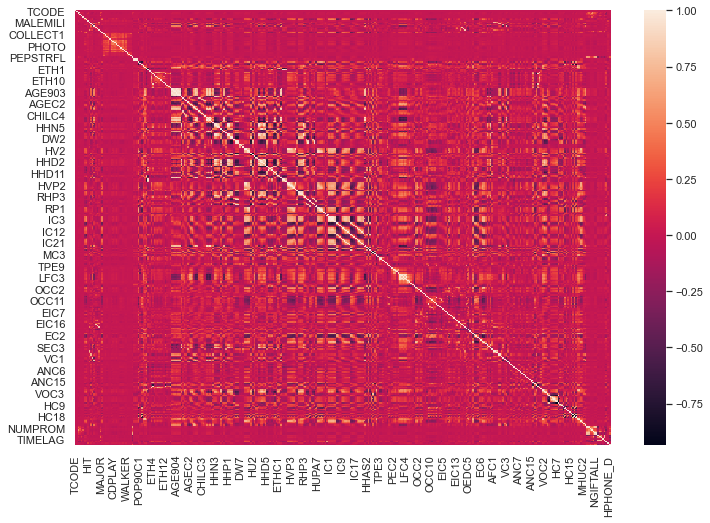

In [22]:
data_corr = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data_corr)

## Feature Grouping

In [52]:
corrdata = data_corr.abs().stack()
corrdata = corrdata.sort_values(ascending= False)
corrdata = corrdata[corrdata>0.8] 
corrdata =corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ["Features1","Features2","corr_value"]
corrdata

,Features1,Features2,corr_value
0,HHAGE1,HHAGE3,0.993997
1,HHAGE3,HHAGE1,0.993997
2,HV2,HV1,0.993412
3,HV1,HV2,0.993412
4,ETHC5,ETH2,0.989670
5,ETH2,ETHC5,0.989670
6,POP902,POP901,0.988491
7,POP901,POP902,0.988491
8,POP901,POP903,0.981225
9,POP903,POP901,0.981225


In [53]:
grouped_feature_list = []
correlated_group_list = []
for feature in corrdata.Features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.Features1==feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.Features2.unique()) + [feature]
        correlated_group_list.append(correlated_block)

In [55]:
correlated_group_list

[    Features1 Features2  corr_value
 0      HHAGE1    HHAGE3    0.993997
 138    HHAGE1     HHAS1    0.921519
 180    HHAGE1     AGEC6    0.905412
 215    HHAGE1     ETHC3    0.888914
 281    HHAGE1    AGE904    0.852352
 289    HHAGE1    AGE903    0.848423
 323    HHAGE1    HHAGE2    0.834608
 351    HHAGE1     AGEC7    0.823909
 356    HHAGE1    AGE905    0.821628
 365    HHAGE1    AGE902    0.819944
 373    HHAGE1    AGE906    0.815876,
     Features1 Features2  corr_value
 2         HV2       HV1    0.993412
 108       HV2      HVP1    0.932601
 163       HV2      HVP2    0.911005
 186       HV2      HVP6    0.902442
 320       HV2      HVP3    0.836047,
     Features1 Features2  corr_value
 4       ETHC5      ETH2    0.989670
 112     ETHC5     ETHC4    0.930239,
    Features1 Features2  corr_value
 6     POP902    POP901    0.988491
 17    POP902    POP903    0.977983,
    Features1 Features2  corr_value
 10      HHD7      HHD9    0.980778,
     Features1 Features2  corr_value
 